#K-최근접 이웃모델(K Nearest Neighbors)
##- 각 데이터 간의 거리를 활용해서 새로운 데이터를 예측하는 모델
##- K계에 가장 가까운 이웃 데이터에 의해 어떠한 점의 특성이 결정 또는 예측됨
##- 데이터 간의 거리를 활용해서 새로운 데이터가 어디에 속하는지 구분하는 알고리즘

#장점 :
##- 수식에 대한 설명이 필요 없을만큼 직관적이고 간단함
##- 선형 모델과 다르게 별도의 가정이 없음
##- 예) 선형회귀 : 독립, 종속변수의 선형과정을 가정하고 있어 맞지 않는 데이터에 취약함
##- 예) KNN : 선형적인 가정이 없어 자유로움
#단점 :
##- 데이터가 커지면 상당히 느려질 수 있음
##- 아웃라이어(이상치)가 많은 데이터인 경우에 성능을 보장할 수가 없음

## 아웃라이어 : 평균치에서 크게 벗어나는 데이터

#유용한 곳
##1. 주로 분류에서 사용됨
##- 로지스틱 회귀로 해결할 수 없는 3개 이상의 목표변수들도 분류핤 수 있음
##2. 작은 데이터셋에 적합함



#와인 정보가 들어있는 데이터셋을 이용해 와인 등급 예측하기


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
data = pd.read_csv('wine.csv')
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.describe()
#데이터의 분포가 어떤지, 이상치가 존재하는지 확인

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
data['Wine'].unique()

array([1, 2, 3])

In [7]:
data['Wine'].nunique()

3

In [8]:
data['Wine'].value_counts()

,count
Wine,
2,71
1,59
3,48


<Axes: xlabel='Wine', ylabel='count'>

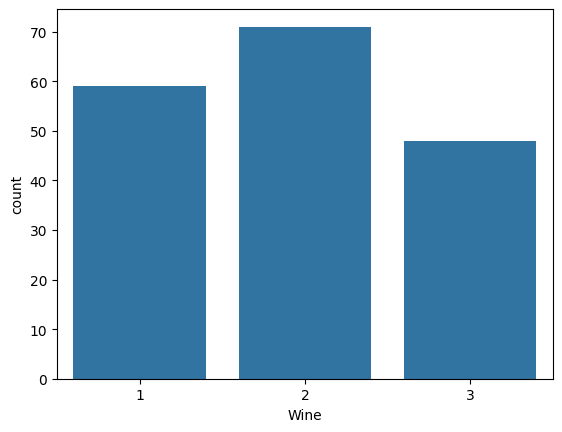

In [9]:
sns.barplot(x = data['Wine'].value_counts().index, y = data['Wine'].value_counts())

<Axes: xlabel='Wine', ylabel='count'>

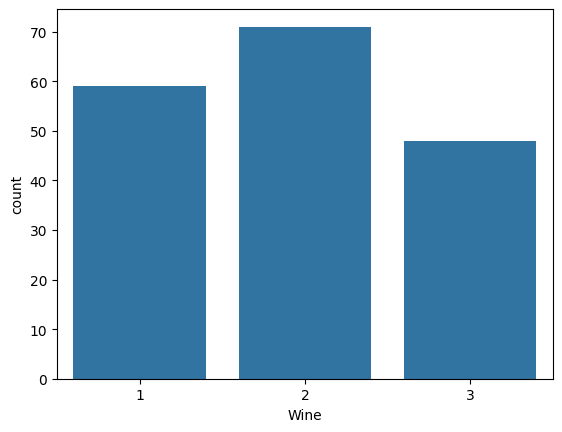

In [10]:
sns.countplot(x='Wine', data=data)
#sns.countplot(x = data['Wine'])

In [11]:
data.isna()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
data.sum()

,0
Wine,345.000000
Alcohol,2314.110000
Malic.acid,415.870000
Ash,421.240000
Acl,3470.100000
Mg,17754.000000
Phenols,408.530000
Flavanoids,361.210000
Nonflavanoid.phenols,64.410000
Proanth,283.180000


In [13]:
data.isna().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [14]:
data.isna().mean()
#이 데이터에는 결측치가 없다

,0
Wine,0.0
Alcohol,0.0
Malic.acid,0.0
Ash,0.0
Acl,0.0
Mg,0.0
Phenols,0.0
Flavanoids,0.0
Nonflavanoid.phenols,0.0
Proanth,0.0


#결측치 처리

In [15]:
#결측치 있다고 가정
data.dropna()
#결측치가 있는 데이터 없애기
#결측치가 없었기 때문에 없어진 데이터는 없다

#데이터에 업데이트 되진 않는다. == 데이터에 반영되는 코드는 아니다.

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
data.dropna().isna().sum()

,0
Wine,0
Alcohol,0
Malic.acid,0
Ash,0
Acl,0
Mg,0
Phenols,0
Flavanoids,0
Nonflavanoid.phenols,0
Proanth,0


In [17]:
#데이터에 반영되는 코드
data.dropna(inplace=True)
#data = data.dropna()

In [18]:
#data['Alcohol']에서 결측치가 존재할 경우 없애기
data.dropna(subset= ['Alcohol'])

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [19]:
data.dropna(subset=['Alcohol']).isna().mean()

,0
Wine,0.0
Alcohol,0.0
Malic.acid,0.0
Ash,0.0
Acl,0.0
Mg,0.0
Phenols,0.0
Flavanoids,0.0
Nonflavanoid.phenols,0.0
Proanth,0.0


In [20]:
#data['Alcohol'] 변수 자체를 지우기
data.drop(['Alcohol'],axis=1)

,Wine,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [21]:
#결측치를 -99값으로 채우기
data.fillna(-99)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
#결측치를 중간값으로 채우기
data.fillna(data.median(), inplace = True)

In [23]:
data.isna().mean()

,0
Wine,0.0
Alcohol,0.0
Malic.acid,0.0
Ash,0.0
Acl,0.0
Mg,0.0
Phenols,0.0
Flavanoids,0.0
Nonflavanoid.phenols,0.0
Proanth,0.0


#전처리 : 결측치 처리하기
##- 문제의 성질에 따른 결측치 처리
##- 제거 or 결측치 자체 의미 분석

##- 보통은 결측치를 평균값으로 채워넣는 경우가 많다(결측지 데이터 제거도 한가지 방법)
##- 평균보다 더 복잡하게 결측치를 채워넣는 방법은 다양하게 존재함
##- 어떤 방법일지라도 실제 데이터만 못하다
###-> 추정치로 결측치를 채워넣으면 오차나 노이즈가 발생한다
##- 결측치를 채우려는 노력과 시간에 비해서 평균으로 처리하는 것보다 나은 결과를 보여주지 않는 경우가 많다
##- 결측치 평균으로 채우는게 무난하다

#결측치 50% 이상 :
##- drop()을 고려함
##- 변수를 모델에서 훈련하지 않고 변수 자체를 제거

#결측치 70% ~ 80% 이상
##- 가급적 drop()적용하는 것이 좋음
##- 사용하지 않는 것이 좋음

#결측치 90% 이상
##- 90%가 결측치라고 해도, 해당 변수가 프로젝트에서 매우 중요한 역할을 할 것이라 예상된다면 활용방법을 찾는 것이 좋음
##- 중요한 데이터 아니면 이걸 왜 쓰냐

#예시
##- 기상, 기후 데이터 분석
##- 비가 안 오는 날 == 결측


#스케일링
##- 독립변수의 범위를 동일한 수준으로 만드는 데 사용되는 방법
##- 데이터에서 1이라는 값이 차지하는 의미가 다름
##- 변수별 변동 폭이 다르다
##- 최소한 거리 기반의 k 최근접 이웃 방법에서는 이 변수의 변동 폭을 맞춰줄 필요가 있음
##- 각 변수별로 1씩 차이 나는 것이 유사한 의미를 지닐 수 있도록 하는 과정
##- 스케일링 이후에는 1이라는 값이 가지는 의미가 같아진다
##- 다양한 기법 존재
##- 스케일링은 인공신명망을 활용하는 딥러닝이나 딥러닝 방법론에서는 변수들에게  필요한 과정
##- 머신러닝 알고리즘의 랜덤 포레스트에는 스케일링이 필요 없음
## -> 활용 방법론에 따라 스케일링 처리 유무 결정

#스케일링 종류

# 표준화 스케일링 :
##- 평균이 0이 되고, 표준편차가 1이 되도록 데이터를 고르게 분포시키는 데 사용
##- (변수의 i번째 값 - 변수의 평균)/변수의 표준편차
##- 데이터를 표준화된 정규분포로 만들어주는 방법
##- 데이터에 이상치가 존재할 때 이상치의 영향을 받음
##- 평균이 0, 분산이 1이 되도록 분포시키기 때문에, 데이터의 기존 분포 형태가 사라지고 정규분포를 따르게 됨

# 로버스트 스케일링 :
##- 데이터에 아웃라이어가 존재하고, 그 영향력을 그래도 유지하고 싶을 때 사용함
##- (변수의 i번째 값 - 변수의 중간값(50%지점)) / ((75% 지점) - (25% 지점))
##- 평균과 표준편차 대신 사분위값을 이용하여 계산
##- 데이터에 이상치가 존재할 때, 이상치의 영향을 받지 않도록 스케일링 함
##- 변환된 데이터의 범위는 표준화 스케일링이나 최소-최대 스케일링보다 넓게 나타남

# 최소-최대 스케일링 :
##- 데이터 분포의 특성을 최대한 그대로 유지하고 싶을 때 사용함
##- (변수 i번째 값 - 변수의 최솟값) / (변수의 최댓값 - 변수의 최솟값)
##- 모든 데이터가 최댓값 1, 최솟값 0 사이로 변환
##- 이상치의 영향을 받게 됨
##- 데이터의 기존 분포를 가장 있는 그대로 담아낼 수 있음

## 정규화 스케일링 : 행 기준의 스케일링이 필요할 때 사용하나, 실제로 거의 사용하지 않음


# 주의할 점
#1. 스케일링 대상에서 종속변수(예측하고자 하는 변수)를 제외해야 함
#2. 스케일링 전에 훈련 셋과 시험 셋을 나눠어줘야 함
#3. 스케일링은 훈련 셋이만 적용(중요)

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [25]:
st_scaler = StandardScaler()

In [26]:
st_scaler.fit(data)
#데이터 스케일링 학습

StandardScaler()

In [27]:
#스케일링된 데이터 저장
st_scaled = st_scaler.transform(data)

In [28]:
st_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [29]:
pd.DataFrame(st_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [30]:
st_scaled = pd.DataFrame(st_scaled, columns = data.columns)
st_scaled

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [31]:
round(st_scaled.describe(),2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.21,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-1.21,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.08,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,1.37,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,1.37,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


In [32]:
rb_scaler = RobustScaler()

In [33]:
#스케일링과 변환 한번에 하기
rb_scaled = rb_scaler.fit_transform(data)

rb_scaled = pd.DataFrame(rb_scaled, columns = data.columns)

In [34]:
round(rb_scaled.describe(),2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.03,-0.04,0.32,0.02,-0.00,0.09,-0.06,-0.06,0.13,0.05,0.12,-0.02,-0.14,0.15
std,0.39,0.62,0.75,0.79,0.78,0.75,0.59,0.60,0.74,0.82,0.78,0.68,0.58,0.65
min,-0.50,-1.54,-0.76,-2.88,-2.07,-1.47,-1.30,-1.07,-1.25,-1.64,-1.14,-1.44,-1.23,-0.82
25%,-0.50,-0.52,-0.18,-0.43,-0.53,-0.53,-0.58,-0.56,-0.42,-0.44,-0.49,-0.54,-0.68,-0.36
50%,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
75%,0.50,0.48,0.82,0.57,0.47,0.47,0.42,0.44,0.58,0.56,0.51,0.46,0.32,0.64
max,0.50,1.35,2.66,2.50,2.44,3.37,1.44,1.76,1.91,2.89,2.79,2.21,0.99,2.08


In [35]:
mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
mm_sclaed = pd.DataFrame(mm_scaled, columns = data.columns)
round(mm_sclaed.describe(),2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.47,0.52,0.32,0.54,0.46,0.32,0.45,0.36,0.44,0.37,0.32,0.39,0.49,0.33
std,0.39,0.21,0.22,0.15,0.17,0.16,0.22,0.21,0.23,0.18,0.20,0.19,0.26,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.35,0.17,0.45,0.34,0.20,0.26,0.18,0.26,0.26,0.17,0.25,0.24,0.16
50%,0.50,0.53,0.22,0.53,0.46,0.30,0.47,0.38,0.40,0.36,0.29,0.39,0.55,0.28
75%,1.00,0.70,0.46,0.64,0.56,0.40,0.63,0.53,0.58,0.49,0.42,0.52,0.70,0.50
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Wine',axis = 1),data['Wine'], test_size = 0.2, random_state = 100)

In [38]:
# X = data.drop('Wine',axis = 1)
# y = data['Wine']

# X_train, X_test, y_train, y_test = train_test_split(test_size = 0.2, random_state = 100)

In [39]:
#스케일링은 학습셋으로
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [40]:
X_train_scaled = mm_scaler.transform(X_train)

#시험셋도 학습셋으로 스케일링 시킨 모델로 적용시켜야 함
X_test_scaled = mm_scaler.transform(X_test)

In [41]:
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.fit_transform(X_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#모델불러오기
knn = KNeighborsClassifier()
#학습
knn.fit(X_train_scaled, y_train)
#예측하기
pred = knn.predict(X_test_scaled)

In [45]:
pred

array([2, 3, 1, 2, 3, 3, 2, 2, 2, 1, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3])

In [46]:
from sklearn.metrics import accuracy_score
#학습셋과 예측값을 통해 모델의 정확도 평가
accuracy_score(y_test, pred)

0.9444444444444444

In [47]:
knn = KNeighborsClassifier(n_neighbors=7)#기본값은 5
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9444444444444444

#KNN알고리즘
##- 새로운 데이터를 예측할 때, 거리를 기반으로 하여 인접한 데이터와 같은 종류로 분류해내는 기법

#X의 스케일이 Y보다 2배 정도 크다면?
##- 이전과 비교해 가까운 점이 달라지게 됨
##- 일관된 범위로 통일시키는 스케일링 필요

#인접한 데이터와의 거리가 동점일 때
##- 고려할 이웃의 수를 항상 홀수로 유지 -> 동점이 나올 수 없다
##- 거리가 가까운 점으로 가중치 부여

In [49]:
#n_neighbors : 주변 이웃을 3개까지 고려
#p : 데이터 간의 거리계산 방식
#p = 1 : 맨해튼 거리
#p = 2 : 유클리드 거리
#p = 3,4,5... : 그 외 방법 민코우스키 거리
knn = KNeighborsClassifier(p = 2, n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9722222222222222

In [50]:
knn = KNeighborsClassifier(p = 1, n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9722222222222222

In [51]:
k_param = range(1,11)
test_acc_list = []

for k in k_param:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_scaled, y_train)
  pred = knn.predict(X_test_scaled)
  test_acc_list.append(accuracy_score(y_test, pred))

In [53]:
dic = {'k':k_param, 'accuracy':test_acc_list}
acc_df = pd.DataFrame(dic)
acc_df

,k,accuracy
0,1,0.944444
1,2,0.944444
2,3,0.972222
3,4,0.944444
4,5,0.944444
5,6,0.944444
6,7,0.944444
7,8,0.944444
8,9,0.944444
9,10,0.944444


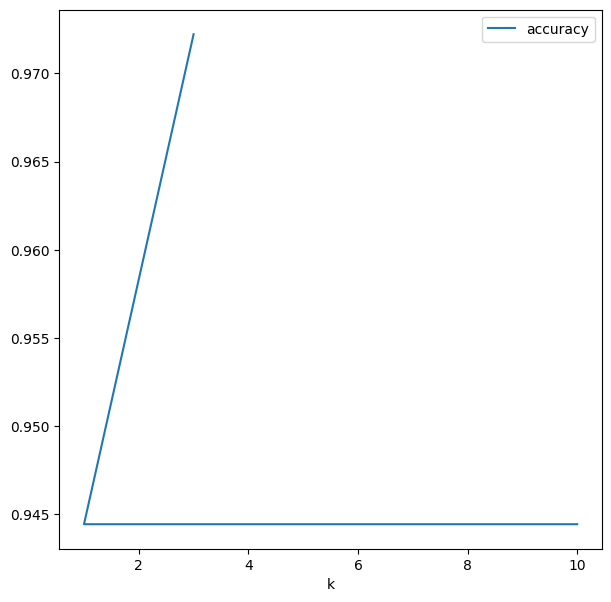

In [56]:
#k에 따른 정확도
acc_df2 = acc_df.set_index('k')
acc_df2 = acc_df2.sort_values(by = 'accuracy', ascending = False)
acc_df2.plot(figsize=(7,7))
plt.xlabel('k')
plt.show()

#1단계 : 문제정의
##- 와인에 대한 정보를 사용하여 와인의 등급을 예측하는 모델을 만듦

#2단계 : 라이브러리 및 데이터 불러오기, 데이터 확인하기
##- import pandas, numpy, matplolib.pyplot, seaborn
##- 프로젝트에 쓸 예제 데이터셋 불러옴

#3단계 : 데이터 확인하기
##- 데이터에 결측치가 있음을 확인
##- 그밖에 통계적인 정보도 간단히 살펴보았음
##- KNN에서는 변수의 스케일이 중요하게 작용하는데, 데이터셋에서 변수의 스케일들이 상당히 다르다는 점을 확인할수 있었음

#4단계 : 목표값에서 고유값 확인하기
##- 와인이 몇 가지 등급을 갖는지 확인했음

#5단계 : 전처리 : 결측치 처리하기
##- 중위값으로 결측치 처리함

#6단계 : 스케일링
##- 거리 기반 모델을 사용하기 때문에 스케일링을 통해 변수들의 스케일에 맞추었음

#7단계 : 모델링 및 예측/평가하기
##- K-최근점 이웃 알고리즘을 사용하여 와인을 3개의 등급으로 분류하는 모델을 만들었음

#8단계 : 하이퍼 파라미터 튜닝하기
##- K-최근접 이웃을 이웃을 몇 개로 고려하냐에 따라 결과가 달라짐
##- 최적의 이웃 수를 찾는 방법을 학습함

#결측치 : 데이터가 비어있는 값
##- Null, NaN, NA 등으로 표현